# Homework 10: Evaluating our Gesture Recognition NNs 🕸

Name: Finley Li 

Student ID: 465060

Collaborators:


## Instructions

In our _last_ homework (woohoo!), we will be analyzing and evaluating the gesture recognition data and models created in `Lab10`. This is a great opportunity to recap the **Data Science workflow** with all its major aspects: 

- exploratory data analysis (EDA) and data profiling
- machine learning workkflow
- training, validation, testing data
- model comparison
- presenting results (creating plot)

It will be extremely helpful to review **Lab 10 (Gesture Recognition with Neural Networks)** first.

In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Introduction

The data needed for this assignemnt can be found [here](https://wustl.box.com/s/q8mnl1o2zq2bh0ca5zajtk3msnu03ou8). All of it was gathered in `Homework 10 (Part I)`: 
- training
- validation
- augmented
- testing

Here are the neural network models trained on `training`:
- cse217_v1.h5 (still training; watch for announcement on Piazza)
- cse217_v2.h5 (still training; watch for announcement on Piazza)

Here are the neural network models trained on `augmented`:
- cse217_v1_augmented.h5 (still training; watch for announcement on Piazza)
- cse217_v2_augmented.h5 (still training; watch for announcement on Piazza)

Note that to train these models we used the `validation` dataset to determine when to stop the training process. 

## 2. Test Data Collection, Data Profiling, and Model Understanding

In this section, we will get a feel for our data.

### Problem 0

Following the instructions in `Lab10_DataAquisition` take 15 images of rock, paper, and scissors gestures (cf. `1.1 How To Take The Pictures`) and scale them using the provided code (`1.2 Storing, Scaling, and Sharing the Images`). Store them in a folder called `testing` along with the already collected data.

In [2]:
from os import makedirs, mkdir
from os.path import exists

base = 'utility/data'
raw = f'{base}/raw'
dirs = ['rock', 'paper', 'scissors']

if not exists(raw):
    makedirs(raw, exist_ok=True)

for sign in dirs:
    path = f'{raw}/{sign}'
    
    if not exists(path):
        mkdir(path)

**Try this!** Store the images you took of rocks (✊), papers (🤚), and scissors (✌️) in the correct folders in `utility/data/raw`. Then, run the following cell to produced rescaled images, which will be stored in `utility/data/testing`.

In [3]:
import os
import warnings
from utility.util import load_image, resize_image, save_image


testing = f'{base}/testing'

for sign in dirs:
    path = f'{testing}/{sign}'
    
    if not exists(path):
        makedirs(path, exist_ok=True)

for path, _, files in os.walk(raw):
    sign = os.path.basename(path)

    for file in files:
        input_path = f'{path}/{file}'
        output_path = f'{testing}/{sign}/{file}'
        
        # note! warnings about lossy conversion are ok
        image = load_image(input_path)
        image = resize_image(image, (500, 500))

        save_image(output_path, image)

### Problem 1

**Write-up!**  Report the number of images per class in each of the four datasets. Are the dataset balanced? No code submission required.
> Hint: For most of this you can use the code from `Lab10_Model` with light modifications. 

In [4]:

from os import listdir
dataset_names = ["training", "validation","testing","augmented"] 
data_dirs = [f'{base}/{dn}' for dn in dataset_names] # directories of the dataset
class_dirs={}

print("Directories: %s"%(data_dirs))
for ddir in data_dirs:
    class_dirs.update({f'{ddir}/rock': 0, f'{ddir}/paper': 1, f'{ddir}/scissors': 2})
print("Class directories: %s"%(class_dirs))

print("///////////////////////////////////////////////////////")
print()
for cdir, cdir_class in class_dirs.items():
    print(f"{dirs[cdir_class]}: {len(listdir(cdir))}")

Directories: ['utility/data/training', 'utility/data/validation', 'utility/data/testing', 'utility/data/augmented']
Class directories: {'utility/data/training/rock': 0, 'utility/data/training/paper': 1, 'utility/data/training/scissors': 2, 'utility/data/validation/rock': 0, 'utility/data/validation/paper': 1, 'utility/data/validation/scissors': 2, 'utility/data/testing/rock': 0, 'utility/data/testing/paper': 1, 'utility/data/testing/scissors': 2, 'utility/data/augmented/rock': 0, 'utility/data/augmented/paper': 1, 'utility/data/augmented/scissors': 2}
///////////////////////////////////////////////////////

rock: 266
paper: 266
scissors: 264
rock: 66
paper: 66
scissors: 66
rock: 5
paper: 5
scissors: 5
rock: 1237
paper: 1255
scissors: 1258


### Problem 2
Now, let's look at our models. 

**Write-up!**  Compare the following statistics for all four models: 
- number of parameters
- number of convolutional layers
- number of dense layers
- size of the model (`.h5`) file 

What are the most surprising aspects of these statistics to you? 

In [5]:
from tensorflow.keras.models import load_model
m1_name = "model.v1.raw.h5"
m2_name="model.v2.raw.h5"
m3_name="model.v1.augmented.h5"
m4_name="model.v2.augmented.h5"



m1 = load_model(f"utility/{m1_name}", compile=False)
m2 = load_model(f"utility/{m2_name}", compile=False)
m3 = load_model(f"utility/{m3_name}", compile=False)
m4 = load_model(f"utility/{m4_name}", compile=False)



m1.summary()
m2.summary()
m3.summary()
m4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 5)       140       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 5)       230       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 5)         230       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 5)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 5)         230       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 5)         0

## 3. Model Comparison: v1 vs v2

By now we should know all of the ins and outs about our datasets and models (right?). Let's evaluate and compare the models. 

### Problem 3

First let's investiage which of the two versions `cse217_v1` or `cse217_v2` performs better in the non-augmented setting. You can use the code provided in the *updated version* of  `Lab10_Model` under `5. Evaluate Neural Network on Validation Data` with light modifications. 

**Write-up** For both versions report the accuracy on all three datasets `training`, `validation`, and `testing` and summarize your findings. 
- Which model performs better? Justify your answer based on the presented accuraccies. 
- Argue whether we can be happy with the perfomrance of our model. If yes, justify why, if no, give suggestions on how to imporve the performance. 

In the following cell, we provide an example of how to load the testing. Note the dimensions of the dataset (especially the size of the images).

In [6]:
from utility.util import load_dataset
import matplotlib.pyplot as plt
import pathlib
import skimage
from tensorflow.keras.models import load_model
import numpy as np






target_shape = (500, 500)
X_train,y_train=load_dataset('utility/data/training', target_shape)
X_test, y_test = load_dataset('utility/data/testing', target_shape)
X_val,y_val=load_dataset('utility/data/validation', target_shape)








utility/data/training/paper/1.jpg
utility/data/training/paper/2.jpg
utility/data/training/paper/20200420_184233.jpg
utility/data/training/paper/20200420_184236.jpg
utility/data/training/paper/20200420_184239.jpg
utility/data/training/paper/20200420_184245.jpg
utility/data/training/paper/3.jpg
utility/data/training/paper/4.jpg
utility/data/training/paper/5.jpg
utility/data/training/paper/94128039_177562080037773_1466744195011051520_n.jpg
utility/data/training/paper/94207753_959390134481555_1516703722749558784_n.jpg
utility/data/training/paper/94258301_266924464470492_2966573674154426368_n.jpg
utility/data/training/paper/94458623_245476626576357_152227968981139456_n.jpg
utility/data/training/paper/94624216_159517542104879_9146173040546021376_n.jpg
utility/data/training/paper/d.png
utility/data/training/paper/e.png
utility/data/training/paper/f.png
utility/data/training/paper/g.png
utility/data/training/paper/Image 11.jpeg
utility/data/training/paper/Image 12.jpeg
utility/data/training/pa

utility/data/training/paper/IMG_9989.jpg
utility/data/training/paper/IMG_9990.jpg
utility/data/training/paper/IMG_9992.jpg
utility/data/training/paper/p1.jpg
utility/data/training/paper/p2.jpg
utility/data/training/paper/p3.jpg
utility/data/training/paper/p4.jpg
utility/data/training/paper/p5.jpg
utility/data/training/paper/Paper 1.jpg
utility/data/training/paper/Paper 2.jpg
utility/data/training/paper/Paper 3.jpg
utility/data/training/paper/Paper 4.jpg
utility/data/training/paper/Paper.jpg
utility/data/training/paper/paper0.jpg
utility/data/training/paper/paper1.jpg
utility/data/training/paper/paper10.jpg
utility/data/training/paper/paper1jche.JPG
utility/data/training/paper/PAPER1LAB10.jpg
utility/data/training/paper/paper1n.jpg
utility/data/training/paper/paper1zzhao.jpg
utility/data/training/paper/Paper2.jpg
utility/data/training/paper/paper22.jpg
utility/data/training/paper/paper2345345.jpg
utility/data/training/paper/paper2jche.JPG
utility/data/training/paper/PAPER2LAB10.jpg
util

utility/data/training/rock/IMG_3572.JPG
utility/data/training/rock/IMG_3573.JPG
utility/data/training/rock/IMG_3646-Copy1 (1).jpg
utility/data/training/rock/IMG_3651-Copy1.jpg
utility/data/training/rock/IMG_3670-Copy1.jpg
utility/data/training/rock/IMG_3675-Copy1.jpg
utility/data/training/rock/IMG_4027.jpeg
utility/data/training/rock/IMG_4288.jpg
utility/data/training/rock/IMG_4289.jpg
utility/data/training/rock/IMG_4290.jpg
utility/data/training/rock/IMG_4291.jpg
utility/data/training/rock/IMG_4470.JPG
utility/data/training/rock/IMG_4907.jpg
utility/data/training/rock/IMG_4908.jpg
utility/data/training/rock/IMG_4909.jpg
utility/data/training/rock/IMG_4910.jpg
utility/data/training/rock/IMG_5153.jpg
utility/data/training/rock/IMG_5154.jpg
utility/data/training/rock/IMG_5155.jpg
utility/data/training/rock/IMG_5156.jpg
utility/data/training/rock/IMG_5357.jpg
utility/data/training/rock/IMG_5358.jpg
utility/data/training/rock/IMG_5359.jpg
utility/data/training/rock/IMG_5360.jpg
utility/dat

utility/data/training/scissors/IMG_0347.jpg
utility/data/training/scissors/IMG_0419.JPG
utility/data/training/scissors/IMG_0452.jpeg
utility/data/training/scissors/IMG_0697.jpg
utility/data/training/scissors/IMG_0699.jpg
utility/data/training/scissors/IMG_0700.jpg
utility/data/training/scissors/IMG_0701.jpg
utility/data/training/scissors/IMG_0726.jpg
utility/data/training/scissors/IMG_0917.JPG
utility/data/training/scissors/IMG_0918.JPG
utility/data/training/scissors/IMG_0920.JPG
utility/data/training/scissors/IMG_0921.JPG
utility/data/training/scissors/IMG_1002.JPG
utility/data/training/scissors/IMG_1003.JPG
utility/data/training/scissors/IMG_1004.JPG
utility/data/training/scissors/IMG_1005.JPG
utility/data/training/scissors/IMG_1185.JPG
utility/data/training/scissors/IMG_1523.jpg
utility/data/training/scissors/IMG_1524.jpg
utility/data/training/scissors/IMG_1525.jpg
utility/data/training/scissors/IMG_1526.jpg
utility/data/training/scissors/IMG_1570.JPG
utility/data/training/scissors/

utility/data/training/scissors/Scissors 1.jpg
utility/data/training/scissors/Scissors 2.jpg
utility/data/training/scissors/Scissors 3.jpg
utility/data/training/scissors/Scissors 4.jpg
utility/data/training/scissors/scissors.jpg
utility/data/training/scissors/scissors1.jpg
utility/data/training/scissors/scissors11.jpg
utility/data/training/scissors/SCISSORS1LAB10.jpg
utility/data/training/scissors/scissors2.jpg
utility/data/training/scissors/scissors22.jpg
utility/data/training/scissors/SCISSORS2LAB10.jpg
utility/data/training/scissors/scissors2n.jpg
utility/data/training/scissors/scissors3.jpg
utility/data/training/scissors/scissors33.jpg
utility/data/training/scissors/SCISSORS3LAB10.jpg
utility/data/training/scissors/scissors3n.jpg
utility/data/training/scissors/scissors4.jpg
utility/data/training/scissors/scissors44.jpg
utility/data/training/scissors/SCISSORS4LAB10.jpg
utility/data/training/scissors/scissors4n.jpg
utility/data/training/scissors/scissors5n.jpg
utility/data/training/sc

utility/data/validation/rock/IMG_6519.jpg
utility/data/validation/rock/IMG_6650.jpeg
utility/data/validation/rock/IMG_7136.JPG
utility/data/validation/rock/IMG_7147.PNG
utility/data/validation/rock/IMG_7433.jpeg
utility/data/validation/rock/IMG_8793.jpg
utility/data/validation/rock/IMG_9321.jpg
utility/data/validation/rock/IMG_9984.jpg
utility/data/validation/rock/Photo on 4-22-20 at 2.26 PM.jpg
utility/data/validation/rock/r5.jpg
utility/data/validation/rock/Rock 5.jpg
utility/data/validation/rock/rock0.jpg
utility/data/validation/rock/rock3n.jpg
utility/data/validation/rock/Rock5.jpg
utility/data/validation/rock/rock5jche.JPG
utility/data/validation/rock/ROCK5LAB10.jpg
utility/data/validation/rock/rock5zzhao.jpg
utility/data/validation/rock/rock_resize.png
utility/data/validation/rock/WeChat Image_20200424001428.jpg
utility/data/validation/rock/WIN_20200420_20_29_31_Pro.jpg
utility/data/validation/rock/wrock5.jpg
utility/data/validation/scissors/2.jpg
utility/data/validation/scissors

In [46]:
#method to calculate accuracy 

def accuracy(image,label, model):
    acc = 0
#     label =  data["label"]
#     image = data["image"]
    patchsize = model.input_shape[1]
    for i in range(0,len(image)):
        image_tran = skimage.transform.resize(image[i], (patchsize,patchsize))
        outs = model.predict(np.array([image_tran]))
        predicted = np.argmax(outs)
        if predicted == np.argmax(label[i]):
            acc+=1
    
    print("Number of pictures predicted correctly by model: %d" % acc)
    print("Number of picutres in the dataset: %d" % len(image))

    return acc/len(image)


# Compute Model Performance
a1_training=accuracy(X_train,y_train,m1) 
print(f'Model v1 training accuracy is {a1_training}')



In [7]:
a2_training=accuracy(X_train,y_train,m2)
print(f'Model v2 training accuracy is {a2_training}')

Number of pictures predicted correctly by model: 449
Number of picutres in the dataset: 784
Model v2 training accuracy is 0.5727040816326531


In [8]:
a1_val=accuracy(X_val,y_val,m1)
print(f'Model v1 validation accuracy is {a1_val}')
a2_val=accuracy(X_val,y_val,m2)
print(f'Model v2 validation accuracy is {a2_val}')

Number of pictures predicted correctly by model: 83
Number of picutres in the dataset: 195
Model v1 validation accuracy is 0.4256410256410256
Number of pictures predicted correctly by model: 92
Number of picutres in the dataset: 195
Model v2 validation accuracy is 0.4717948717948718


In [9]:
a1_testing= accuracy(X_test,y_test,m1) 
a2_testing=accuracy(X_test,y_test,m2)
print(f'Model v1 testing accuracy is {a1_testing}')
print(f'Model v2 testing accuracy is {a2_testing}')


Number of pictures predicted correctly by model: 8
Number of picutres in the dataset: 15
Number of pictures predicted correctly by model: 7
Number of picutres in the dataset: 15
Model v1 testing accuracy is 0.5333333333333333
Model v2 testing accuracy is 0.4666666666666667


### Problem 4

Now, that we have summarized and analyzed the average performance of the models, let's look at individual images. 

**Write-up**  Using your own `testing` set and the better performing version that you identified in the previous problem, which of the three classes get predicted more correctly, which of the classes get mistaken for what other classes more frequently? 

> Hint: you may use the visualization implemented in the *updated version* of  `Lab10_Model` under `5. Evaluate Neural Network on Validation Data` (last code cell).  

In [20]:
# Do the imports again (in case you start executing from here!)
import matplotlib.pyplot as plt
import pathlib
import skimage
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd

# Setup to show interactive jupyter widgets
from IPython.display import Image, display
from ipywidgets import interact, fixed
import ipywidgets as widgets
from utility.util import create_user_testdata



# Show results by processing a single validataion or testing image
names = ["rock", "paper", "scissors"]





# Show results by processing a single validataion or testing image
names = ["rock", "paper", "scissors"]

%matplotlib inline
def resultsShow(i, data, model):
    guide = { 0:"rock",1:"paper",2:"scissor"}
    d = data.iloc[i]
    im = d["image"]
    l = d["label"]
    fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15,5),gridspec_kw={'width_ratios':[1,1,0.5]})
    
    imt = imr = skimage.transform.resize(im, (model.input_shape[1],model.input_shape[1]))
    axs[0].imshow(im)
    axs[0].set_title("Image (true class: {})".format(names[l]))
    
    axs[1].imshow(imt,interpolation="nearest")
    axs[1].set_title("Network input")
    
    outs = model.predict(np.array([imt]))
    predicted = np.argmax(outs)
    print(outs)
    print("predicted label, %s" % guide.get(predicted))
    print("actual label, %s"% guide.get(l))

    axs[2].bar(np.array(range(len(names)))-0.5, outs[0,:], 1, color="gray")
    axs[2].set_ylim([0,1])
    axs[2].set_xticks(range(len(names)))
    axs[2].set_xticklabels(names)
    axs[2].set_ylabel("probability")
    axs[2].set_xlabel("class")
    axs[2].set_title("Network output")
    fig.tight_layout()
    plt.show()
    #fig.savefig("out_{:05d}_{}.png".format(i,("ok" if predicted==l else "ko")))    

    
    
dataset_val = create_user_testdata(base,"testing")
dataset_val







 20%|████████████████▊                                                                   | 1/5 [00:00<00:00,  9.90it/s]

Found directory utility\data\testing\c0 containing class rock
Found directory utility\data\testing\c1 containing class paper
Found directory utility\data\testing\c2 containing class scissors


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.04it/s]


Done


,file,label,image,dn
0,utility\data\testing\c2\94206978_2316862847223...,2,"[[[222, 205, 175], [221, 204, 174], [221, 204,...",testing
1,utility\data\testing\c2\94390381_6762054365001...,2,"[[[226, 211, 180], [226, 211, 180], [226, 211,...",testing
2,utility\data\testing\c2\94477973_2606521462921...,2,"[[[229, 214, 181], [229, 214, 181], [229, 214,...",testing
3,utility\data\testing\c2\94777092_5446335397790...,2,"[[[221, 206, 175], [221, 206, 175], [221, 206,...",testing
4,utility\data\testing\c2\95097274_8646291473900...,2,"[[[217, 200, 170], [218, 201, 171], [220, 203,...",testing
5,utility\data\testing\c1\94317956_2349686409172...,1,"[[[219, 204, 173], [219, 204, 173], [219, 204,...",testing
6,utility\data\testing\c1\94506247_2341532979041...,1,"[[[226, 211, 182], [226, 211, 182], [226, 211,...",testing
7,utility\data\testing\c1\95017765_5686846637598...,1,"[[[222, 207, 174], [222, 207, 174], [222, 207,...",testing
8,utility\data\testing\c1\95082149_2732095003874...,1,"[[[221, 206, 175], [221, 206, 175], [221, 206,...",testing
9,utility\data\testing\c1\95082149_2732095003874...,1,"[[[221, 206, 175], [221, 206, 175], [221, 206,...",testing


Results on individual testing inputs: 
[[0.37965617 0.3031962  0.31714755]]
predicted label, rock
actual label, scissor


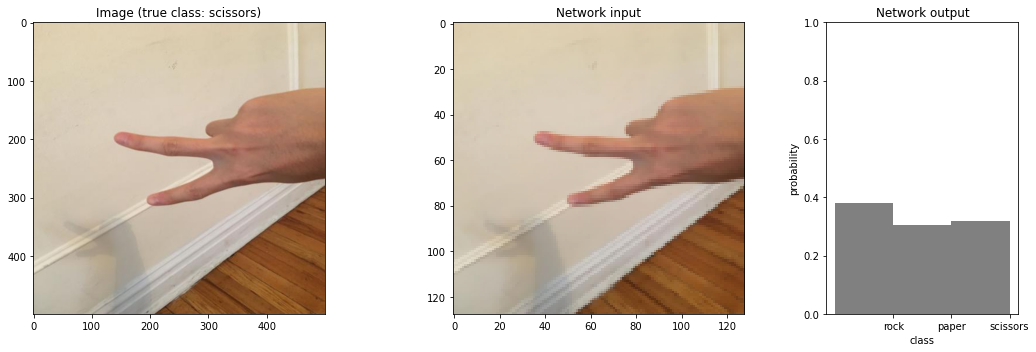

[[0.3655467  0.30170044 0.3327529 ]]
predicted label, rock
actual label, scissor


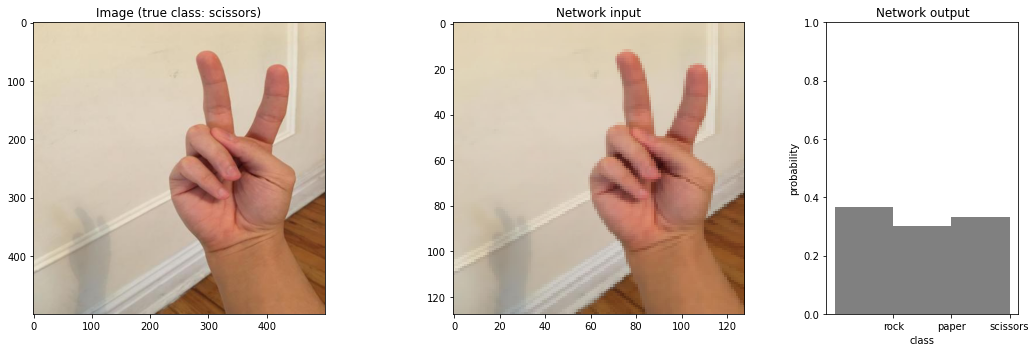

[[0.3828342  0.28375474 0.33341104]]
predicted label, rock
actual label, scissor


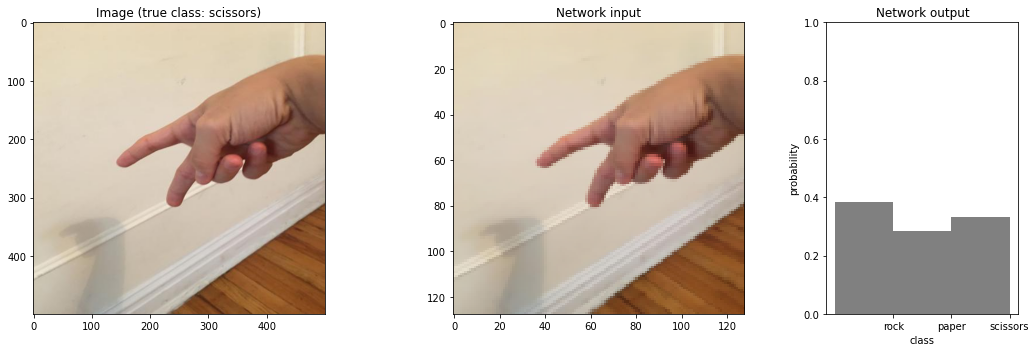

[[0.3430875  0.31283918 0.34407336]]
predicted label, scissor
actual label, scissor


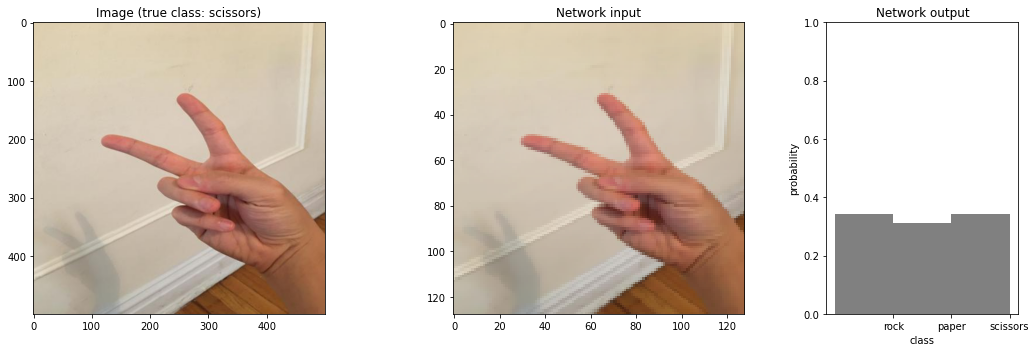

[[0.35098574 0.3174105  0.33160374]]
predicted label, rock
actual label, scissor


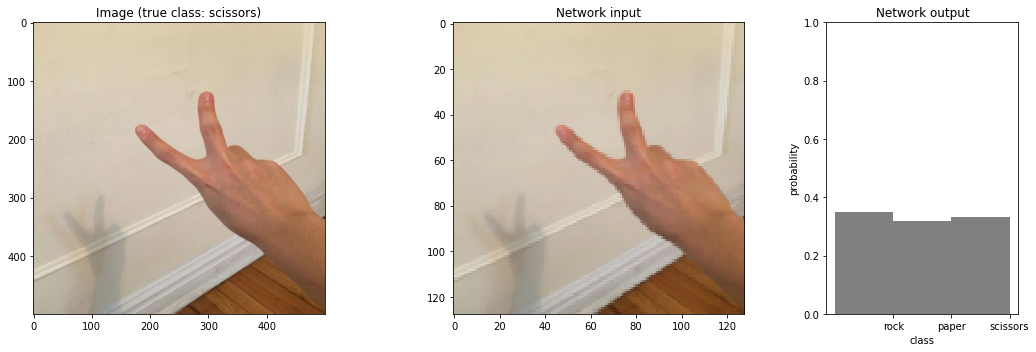

[[0.3573866 0.315293  0.3273204]]
predicted label, rock
actual label, paper


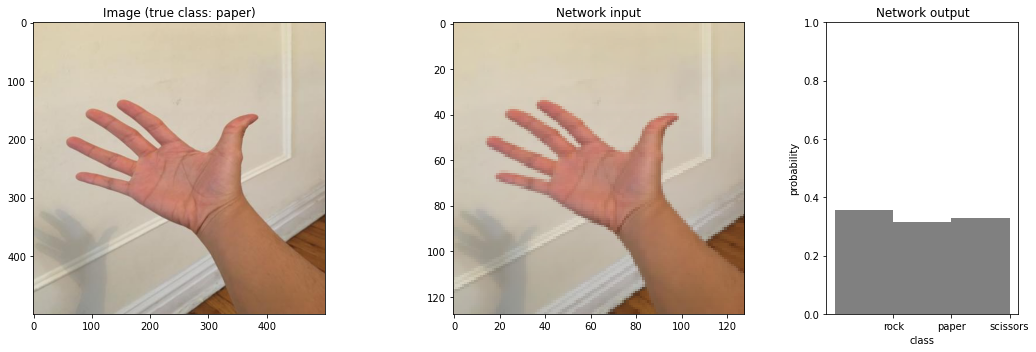

[[0.33383894 0.30991676 0.3562442 ]]
predicted label, scissor
actual label, paper


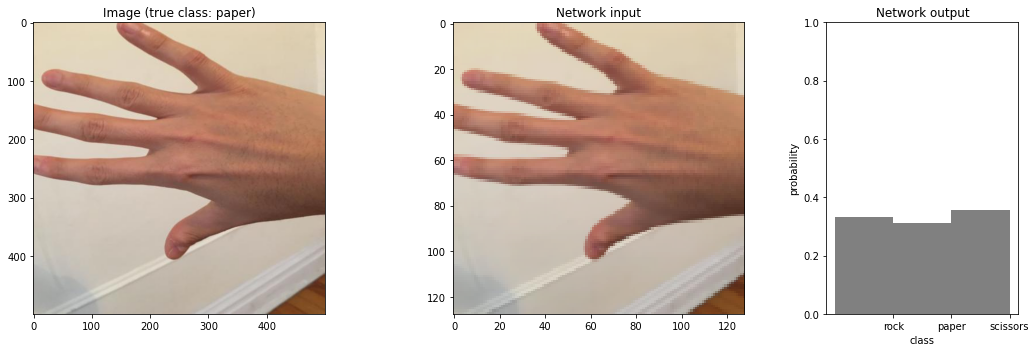

[[0.33830252 0.33029377 0.3314037 ]]
predicted label, rock
actual label, paper


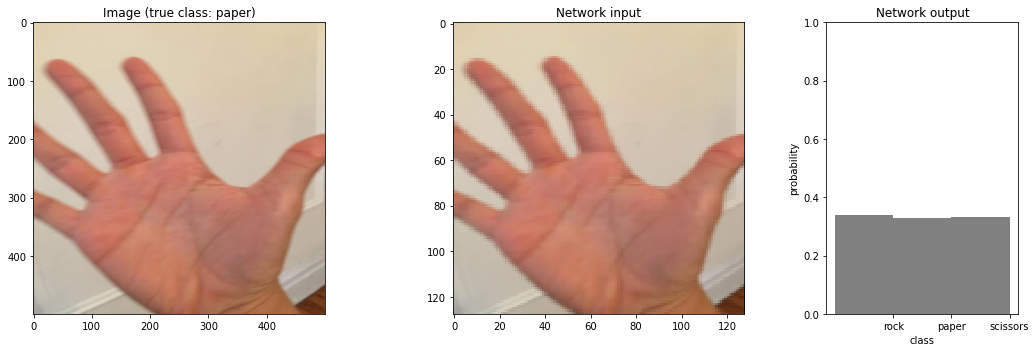

[[0.3436925  0.31322587 0.34308168]]
predicted label, rock
actual label, paper


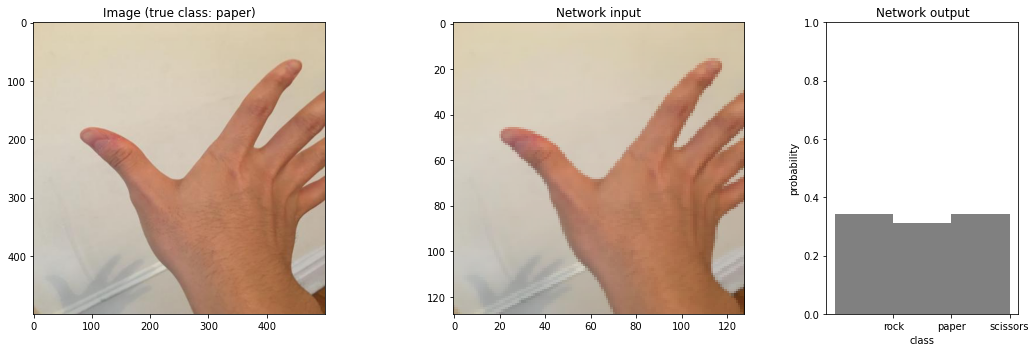

[[0.3436925  0.31322587 0.34308168]]
predicted label, rock
actual label, paper


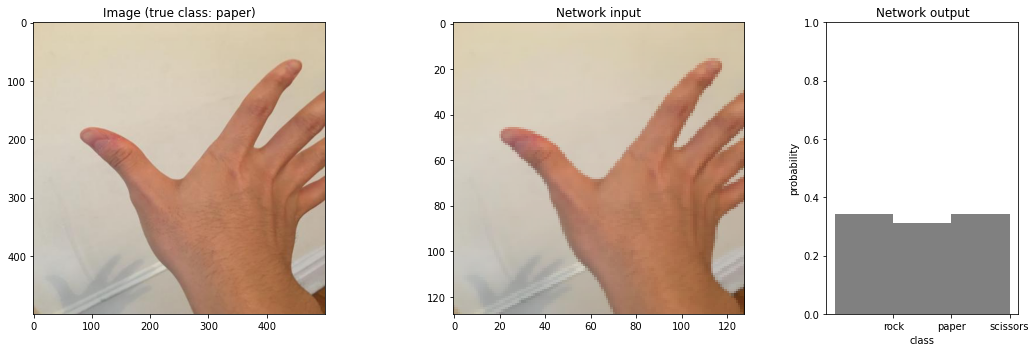

[[0.33671653 0.35294244 0.31034106]]
predicted label, paper
actual label, rock


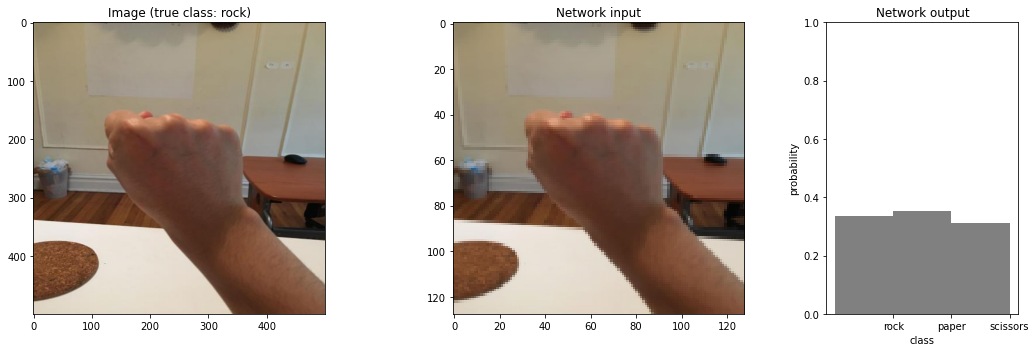

[[0.3525864 0.3197434 0.3276702]]
predicted label, rock
actual label, rock


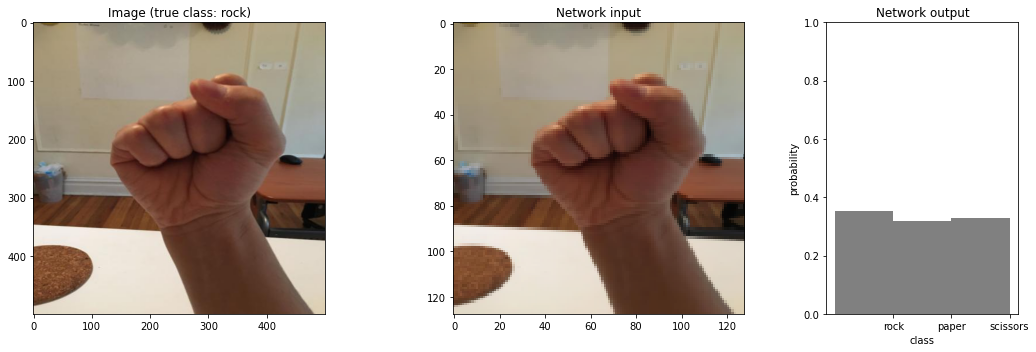

[[0.3348578  0.3526959  0.31244627]]
predicted label, paper
actual label, rock


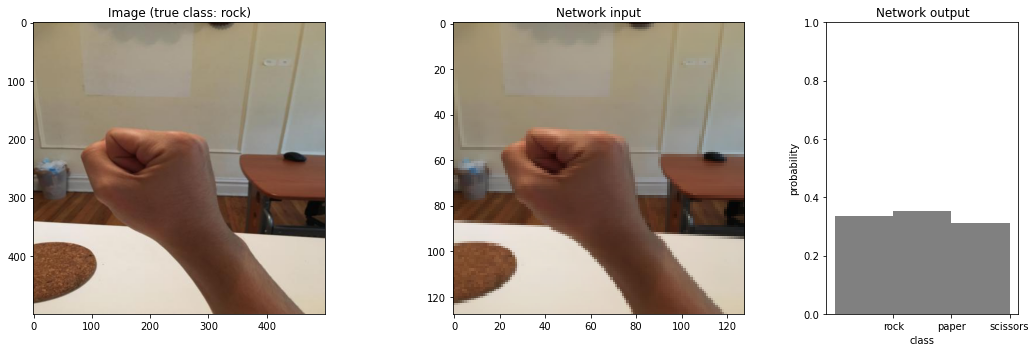

[[0.34769812 0.31790718 0.33439466]]
predicted label, rock
actual label, rock


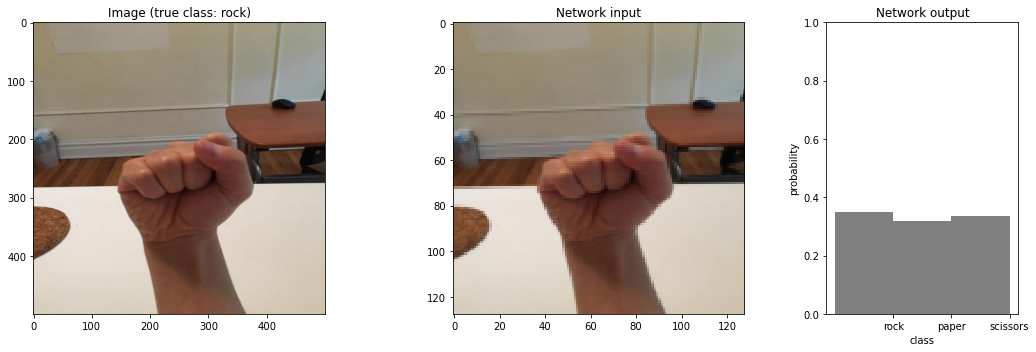

[[0.32706198 0.3441143  0.32882366]]
predicted label, paper
actual label, rock


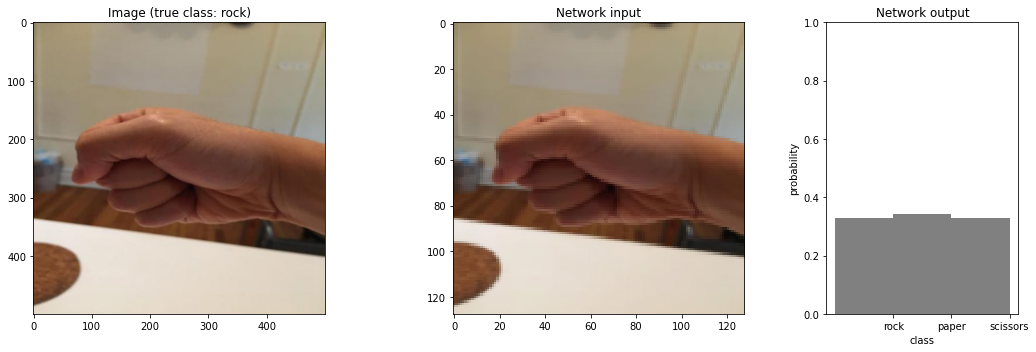

In [44]:
# Visualize Predictions    
print("Results on individual {} inputs: ".format(dataset_val.loc[0].dn))  

for i in range(0,15):
    resultsShow(i,dataset_val,m1)


## 4. Model Comparison: original vs augmented

Now, let's investiage whether data augmentation imporves performance. 


### Problem 5

Which of the models `cse217_vx`  or `cse217_vx_augmented` for both versions performs better? You can again use the code provided in the *updated version* of `Lab10_Model` under `5. Evaluate Neural Network on Validation Data` with light modifications. 

**Write-up** Report and compare the accuracy on all three datasets `training`, `validation`, and `testing` of the original and the augmented model for both versions. Summarize your findings. 
- Did data augemntation help? 
- Which of the two NN versions benefited or suffered more from data augmentation? 
- Give an explanation/guestimate why this is the case.

In [47]:
a1_training=accuracy(X_train,y_train,m1) 
print(f'Model v1 training accuracy is {a1_training}')
a3_training=accuracy(X_train,y_train,m3)
print(f'Model v3 training accuracy is {a3_training}')

Number of pictures predicted correctly by model: 364
Number of picutres in the dataset: 784
Model v1 training accuracy is 0.4642857142857143
Number of pictures predicted correctly by model: 513
Number of picutres in the dataset: 784
Model v3 training accuracy is 0.6543367346938775


In [48]:
a1_validation=accuracy(X_val,y_val,m1)
print(f'Model v1 validation accuracy is {a1_validation}')
a3_validation=accuracy(X_val,y_val,m3)
print(f'Model v3 validation accuracy is {a3_validation}')

Number of pictures predicted correctly by model: 83
Number of picutres in the dataset: 195
Model v1 validation accuracy is 0.4256410256410256
Number of pictures predicted correctly by model: 123
Number of picutres in the dataset: 195
Model v3 validation accuracy is 0.6307692307692307


In [50]:
a1_testing=accuracy(X_test,y_test,m1)
print(f'Model v1 validation accuracy is {a1_testing}')
a3_testing=accuracy(X_test,y_test,m3)
print(f'Model v3 validation accuracy is {a3_testing}')

Number of pictures predicted correctly by model: 8
Number of picutres in the dataset: 15
Model v1 validation accuracy is 0.5333333333333333
Number of pictures predicted correctly by model: 9
Number of picutres in the dataset: 15
Model v3 validation accuracy is 0.6


In [51]:
a2_training=accuracy(X_train,y_train,m2) 
print(f'Model v2 training accuracy is {a2_training}')
a4_training=accuracy(X_train,y_train,m4)
print(f'Model v4 training accuracy is {a4_training}')

Number of pictures predicted correctly by model: 449
Number of picutres in the dataset: 784
Model v1 training accuracy is 0.5727040816326531
Number of pictures predicted correctly by model: 626
Number of picutres in the dataset: 784
Model v4 training accuracy is 0.798469387755102


In [52]:
a2_validation=accuracy(X_val,y_val,m2) 
print(f'Model v2 validation accuracy is {a2_validation}')
a4_validation=accuracy(X_val,y_val,m4)
print(f'Model v4 validation accuracy is {a4_validation}')

Number of pictures predicted correctly by model: 92
Number of picutres in the dataset: 195
Model v2 validation accuracy is 0.4717948717948718
Number of pictures predicted correctly by model: 142
Number of picutres in the dataset: 195
Model v4 validation accuracy is 0.7282051282051282


In [53]:
a2_testing=accuracy(X_test,y_test,m2) 
print(f'Model v2 testing accuracy is {a2_testing}')
a4_testing=accuracy(X_test,y_test,m4)
print(f'Model v4 testing accuracy is {a4_testing}')

Number of pictures predicted correctly by model: 7
Number of picutres in the dataset: 15
Model v2 testing accuracy is 0.4666666666666667
Number of pictures predicted correctly by model: 10
Number of picutres in the dataset: 15
Model v4 testing accuracy is 0.6666666666666666


### Problem 6

Now, let's have some fun! 

Let's explore a _real-time_ version of the model you identified as performing best running with your webcam. Open a new terminal window (on Mac OS you will need to use the built-in terminal app) and navigate to the directory, where you stored the model. Once there, run the following command, substituting `<model_name>` for the name of the file containing your model:

```
$ python(3) realtime.py <model_name>
```

Have fun!

Note, `realtime.py` uses opencv, so you miht need to install it: 

- **opencv**: `pip(3) install opencv-python`


**Write-up**  Summarize the performance of our NN model. 
- When does it work well, when does it have difficulties in predicting the correct gesture? Consider angle, background, and distance in your answer.  
- Which of the three classes get predicted more correctly, which of the classes get mistaken for what other classes more frequently? 

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission, infact for this hw, we arenot expecting any code submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_.